In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob as gb
import cv2
import shutil
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, AvgPool2D, Input, Dropout, Flatten, BatchNormalization
from keras import layers
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
trainpath ='/content/drive/MyDrive/covid19/dataset-covid/train/'
testpath='/content/drive/MyDrive/covid19/dataset-covid/test/'
Valpath='/content/drive/MyDrive/covid19/dataset-covid/val/'

In [ ]:
#preprocessing data set
#convert image to RGB
#resize Image
#label image

In [4]:
#x_train,y_train
#due to session crash i will take only 500 image
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.png'))
    print( 'numbers of images in folder are : ', len(files))
    count=0
    for file in files: 
        image_class = {'covid': 0, 'Lung-Opacity': 1,'Normal':2,'viral-Pneumonia':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
        count=count+1
        if(count==300):
          break

print("X_train:       ",len(X_train) ) 
print("y_train:       ",len(y_train) ) 

folder name is :  covid
numbers of images in folder are :  2531
folder name is :  Lung-Opacity
numbers of images in folder are :  4208
folder name is :  Normal
numbers of images in folder are :  1508
folder name is :  viral-Pneumonia
numbers of images in folder are :  941
X_train:        1200
y_train:        1200


In [5]:
#300
#x_test,y_test
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.png'))
    print( 'numbers of images in folder are : ', len(files))
    count=0
    for file in files: 
        image_class = {'covid': 0, 'Lung-Opacity': 1,'Normal':2,'viral-Pneumonia':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
        count=count+1
        if(count==100):
          break

print("X_test:       ",len(X_test) ) 
print("y_test:       ",len(y_test) ) 

folder name is :  covid
numbers of images in folder are :  724
folder name is :  Lung-Opacity
numbers of images in folder are :  1203
folder name is :  Normal
numbers of images in folder are :  2039
folder name is :  viral-Pneumonia
numbers of images in folder are :  270
X_test:        400
y_test:        400


In [6]:
#x_validation ,y_validation
#200
new_size=224    
X_val = []
y_val = []
for folder in  os.listdir(Valpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( Valpath  + folder + '/*.png'))
    print( 'numbers of images in folder are : ', len(files))
    count=0
    for file in files: 
        image_class = {'covid': 0, 'Lung-Opacity': 1,'Normal':2,'viral-Pneumonia':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_val.append(list(resized_image))
        y_val.append(image_class[folder])
        count=count+1
        if(count==200):
          break
print("X_val is:       ",len(X_val) ) 
print("y_val is:       ",len(y_val))

folder name is :  covid
numbers of images in folder are :  361
folder name is :  Lung-Opacity
numbers of images in folder are :  601
folder name is :  Normal
numbers of images in folder are :  1019
folder name is :  viral-Pneumonia
numbers of images in folder are :  134
X_val is:        734
y_val is:        734


In [7]:
#convert to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
#using categorical method
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,4)
y_val = to_categorical(y_val,4)
y_test = to_categorical(y_test,4)

In [9]:
#shuffel data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)
X_test,y_test = shuffle(X_test,y_test)

In [10]:
#last step using normalization
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [ ]:
#ANN

In [13]:
model =Sequential([
        layers.Flatten(input_shape=(224,224,3)),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(4, activation='softmax')    
    ])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)              154141696 
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 154,668,548
Trainable params: 154,668,548
Non-trainable params: 0
_________________________________________________________________


In [15]:
#train last layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
epochs = 100
earlystop = EarlyStopping("val_accuracy", patience=30, verbose=1, restore_best_weights=True,)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,callbacks=[earlystop])

Epoch 1/100
38/38 [==============================] - 6s 102ms/step - loss: 63.1812 - accuracy: 0.3717 - val_loss: 10.8728 - val_accuracy: 0.4237
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 4.0627 - accuracy: 0.5633 - val_loss: 3.4771 - val_accuracy: 0.5300
Epoch 3/100
38/38 [==============================] - 2s 49ms/step - loss: 1.8585 - accuracy: 0.6067 - val_loss: 2.3670 - val_accuracy: 0.5000
Epoch 4/100
38/38 [==============================] - 2s 58ms/step - loss: 0.9819 - accuracy: 0.6708 - val_loss: 1.6064 - val_accuracy: 0.5518
Epoch 5/100
38/38 [==============================] - 2s 50ms/step - loss: 1.0750 - accuracy: 0.6542 - val_loss: 1.9949 - val_accuracy: 0.5014
Epoch 6/100
38/38 [==============================] - 2s 49ms/step - loss: 1.2051 - accuracy: 0.6442 - val_loss: 2.8551 - val_accuracy: 0.4918
Epoch 7/100
38/38 [==============================] - 2s 58ms/step - loss: 0.9233 - accuracy: 0.6750 - val_loss: 1.5195 - val_accuracy: 0.6444
Epo

In [16]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 14ms/step - loss: 1.3844 - accuracy: 0.7375


[1.3844199180603027, 0.737500011920929]

In [17]:
y_test_pred = model.predict(X_test)
y_prediction = np.argmax(y_test_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_prediction)
cm

array([[57, 21, 18,  4],
       [ 9, 75, 12,  4],
       [ 9, 12, 66, 13],
       [ 0,  3,  0, 97]])

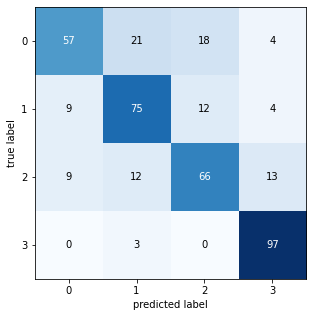

In [19]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_prediction,target_names=list((image_class))))

                 precision    recall  f1-score   support

          covid       0.76      0.57      0.65       100
   Lung-Opacity       0.68      0.75      0.71       100
         Normal       0.69      0.66      0.67       100
viral-Pneumonia       0.82      0.97      0.89       100

       accuracy                           0.74       400
      macro avg       0.74      0.74      0.73       400
   weighted avg       0.74      0.74      0.73       400

